<h1 style="text-align: center;font-weight:900;font-size:30px">CLUSTERING</h1>

## K-MEANS

<div>

## Aim:

To perform clustering on raw data using k-means agorithm.

<div>

## Algorithm:

Step 1: Start<br>
Step 2: Import pandas, matplotlib.pyplot and seaborn<br>
Step 3: Load dataset as a dataframe<br>
Step 4: Pre-process the dataset<br>
Step 5: Plot a scatter plot of 2 columns(variables) for which clustering is to be done<br>
Step 6: Import MinMaxScaler from sklearn.preprocessing<br>
Step 7: Use MinMaxScaler() to rescale the values of the variables<br>
Step 8: Import KMeans from sklearn.cluster<br>
Step 9: Find the number of clusters using Elbow method<br>
Step 10: Use the fit_predict() function to divide the values into different clusters<br>
Step 11: Add the clusters to dataset<br>
Step 12: Plot the scatter plot showing the different clusters<br>
Step 13: Stop<br>

<div>


## Code:

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [59]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [60]:
df = df.dropna()
df['bill_length_mm'] = df['bill_length_mm'].interpolate()
df['bill_depth_mm'] = df['bill_depth_mm'].interpolate()
df['flipper_length_mm'] = df['flipper_length_mm'].interpolate()
df['body_mass_g'] = df['body_mass_g'].interpolate()
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

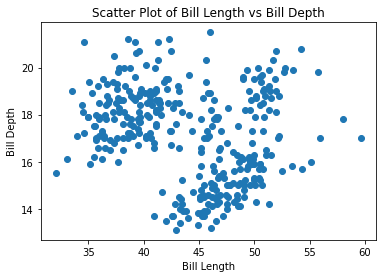

In [61]:
plt.scatter(df['bill_length_mm'],df['bill_depth_mm'])
plt.title('Scatter Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.show()

In [62]:
from sklearn.preprocessing import MinMaxScaler
df['bill_length_mm'] = MinMaxScaler().fit_transform(df[['bill_length_mm']])
df['bill_depth_mm'] = MinMaxScaler().fit_transform(df[['bill_depth_mm']])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,181.0,3750.0,Male
1,Adelie,Torgersen,0.269091,0.511905,186.0,3800.0,Female
2,Adelie,Torgersen,0.298182,0.583333,195.0,3250.0,Female
4,Adelie,Torgersen,0.167273,0.738095,193.0,3450.0,Female
5,Adelie,Torgersen,0.261818,0.892857,190.0,3650.0,Male


In [63]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(df[['bill_length_mm','bill_depth_mm']])
    sse.append(km.inertia_)
sse

[31.375427412063775,
 15.50163534882866,
 8.769486294749543,
 6.751374392837372,
 5.110493661666955,
 4.315037065359885,
 3.723946705212603,
 3.297406921595293,
 2.902423089670712]

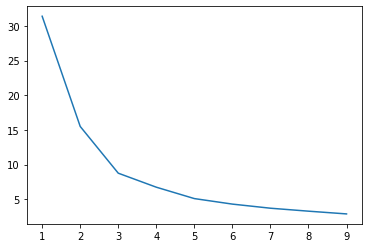

In [64]:
plt.plot(range(1,10),sse)

In [65]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(df[['bill_length_mm','bill_depth_mm']])
ypred

array([1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 2, 1, 1, 1, 4, 4, 1, 1,
       4, 1, 1, 4, 4, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 1, 1,
       4, 2, 4, 1, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4,
       4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 2, 4, 1, 1, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 1, 1, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 4, 0, 4, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 2, 4, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 3, 0, 3, 0, 3, 3,
       3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3,

In [66]:
df['cluster'] = ypred
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,0.254545,0.666667,181.0,3750.0,Male,1
1,Adelie,Torgersen,0.269091,0.511905,186.0,3800.0,Female,4
2,Adelie,Torgersen,0.298182,0.583333,195.0,3250.0,Female,4
4,Adelie,Torgersen,0.167273,0.738095,193.0,3450.0,Female,1
5,Adelie,Torgersen,0.261818,0.892857,190.0,3650.0,Male,1


In [67]:
km.cluster_centers_

array([[0.62420455, 0.36179315],
       [0.27397008, 0.71971067],
       [0.64692308, 0.70650183],
       [0.49925134, 0.14320728],
       [0.21184416, 0.49506803]])

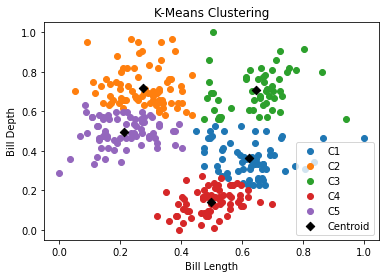

In [68]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1.bill_length_mm,df1.bill_depth_mm,label='C1')
plt.scatter(df2.bill_length_mm,df2.bill_depth_mm,label='C2')
plt.scatter(df3.bill_length_mm,df3.bill_depth_mm,label='C3')
plt.scatter(df4.bill_length_mm,df4.bill_depth_mm,label='C4')
plt.scatter(df5.bill_length_mm,df5.bill_depth_mm,label='C5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
            color='black',marker='D',label='Centroid')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.show()

<hr>

## DBSCAN

## Aim:

To perform clusering using DBSCAN

## Algorithm:

Step1: Start<br>
Step2: Import pandas, seaborn, matplotlib.pyplot<br>
Step3: Import make_blobs from sklearn.datasets<br>
Step4: Generate a dataset using make_blobs<br>
Step5: Plot a scatter plot using the generated data<br>
Step6: Import DBSCAN from sklearn.cluster<br>
Step7: Fit the dataset using DBSCAN <br>
Step8: Plot the scatter plot showing diffferent clusters<br>
Step9: Stop<br>

## Code:

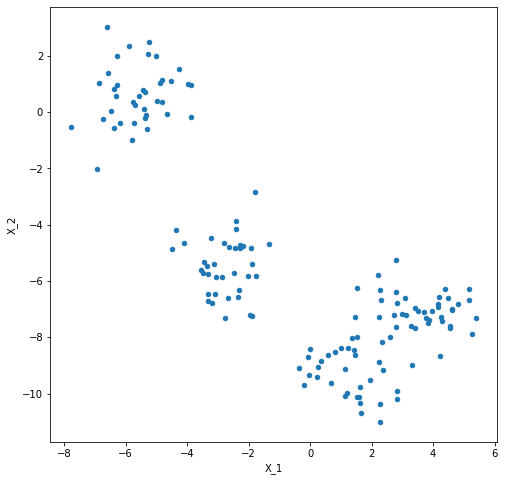

In [104]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X,Y = make_blobs(n_samples=150,centers=4,n_features=2,random_state=16)

df=pd.DataFrame(dict(x=X[:,0],y=X[:,1]))
df.plot.scatter(x='x',y='y',figsize=(8,8))
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [105]:
df.head(10)

,x,y
0,-6.172694,-0.378803
1,4.602630,-7.028945
2,-4.506919,1.098461
3,-7.788053,-0.542500
4,4.547395,-7.591296
5,-5.257837,2.075528
6,2.242148,-7.264501
7,-4.812903,0.358400
8,-0.031903,-9.332998
9,-2.019391,-5.807865


In [106]:
dbscan = DBSCAN(eps=2,min_samples=6).fit(X)
dbscan.labels_

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2,
       0, 2, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1])

In [107]:
len(set(dbscan.labels_))

3

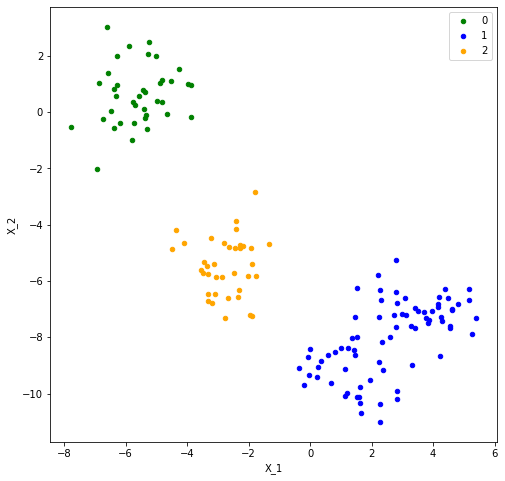

In [108]:
def show_clusters(X,cluster):
    df=pd.DataFrame(dict(x=X[:,0],y=X[:,1],label=cluster))
    colors={-1:'red',0:'green',1:'blue',2:'orange',3:'pink'}
    fig,ax=plt.subplots(figsize=(8,8))
    grouped=df.groupby('label')
    for key,group in grouped:
        group.plot(ax=ax,kind='scatter',x='x',y='y',label=key,color=colors[key])
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()
show_clusters(X,dbscan.labels_)